In [1]:
import pandas as pd
from tqdm.notebook import tqdm
from pandas import Series
data=pd.read_excel('git_data.xlsx') 

In [2]:
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve


In [4]:
new_pr_open=[]
for i in data['r_pr_open']:
    if str(i)=='nan':
        i=0.0
    else:
        i=i
    new_pr_open.append(i)

In [5]:
data['r_pr_open']=new_pr_open

In [7]:
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

In [8]:
dummy_columns=['o_type']
new_data = dummy_data(data, dummy_columns)

### -----------------전처리---------------

In [12]:
y=data.iloc[:,30:31]
y

,y_stars10
0,1
1,1
2,1
3,1
4,1
...,...
9775,0
9776,0
9777,0
9778,0


In [13]:
del new_data['y_stars10']

In [14]:
del new_data['r_main_language']

In [15]:
X=new_data.iloc[:,1:]
X

,r_forks,r_watch,r_open_issues,r_total_issue,r_tag_num,r_pr_open,r_pr_total,r_num_language,r_readme_trend,r_description_trend,...,c_commit_avg,c_descriptionsize_avg,c_gits_avg,c_followers_avg,c_following_avg,c_star_avg,c_repos_avg,c_commit_active,o_type_Organization,o_type_User
0,557,115,316,611,7,37.0,694,5,67,1,...,98.2,64.6,6.6,61.2,8.6,78.6,32.0,709.2,1,0
1,262,45,17,23,0,0.0,49,1,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,179,5,3,10,0,2.0,9,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,167,33,77,112,7,37.0,1186,3,55,4,...,113.6,6.4,0.0,3.8,0.4,8.4,9.6,418.2,1,0
4,81,28,2,2,0,0.0,1,0,149,0,...,10.0,18.0,1.0,53.0,215.0,980.0,61.0,59.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775,0,1,0,0,0,0.0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
9776,0,1,0,0,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
9777,0,1,0,0,0,0.0,0,0,22,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
9778,0,1,0,0,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


## train / test 분리 및 오버샘플링

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2,random_state=10)

In [17]:
X_test

,r_forks,r_watch,r_open_issues,r_total_issue,r_tag_num,r_pr_open,r_pr_total,r_num_language,r_readme_trend,r_description_trend,...,c_commit_avg,c_descriptionsize_avg,c_gits_avg,c_followers_avg,c_following_avg,c_star_avg,c_repos_avg,c_commit_active,o_type_Organization,o_type_User
4461,0,1,0,0,0,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4979,0,0,1,1,0,0.0,0,2,23,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3143,0,1,0,0,0,0.0,0,1,14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2125,0,3,1,1,0,1.0,2,1,2,2,...,31.0,41.0,0.0,5.0,5.0,12.0,8.0,69.0,1,0
368,0,1,0,0,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,1,1,0,0,0,0.0,0,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2165,0,1,0,0,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
5042,18,12,1,7,0,0.0,0,2,53,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4749,0,1,0,0,0,0.0,0,1,7,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [18]:
y_test['y_stars10'].tolist().count(1)

41

In [19]:
y_test['y_stars10'].tolist().count(0)

1915

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_over = scaler.fit_transform(X_train_over)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=6.0009999999999994)
lr.fit(X_train_over, y_train_over.values.ravel())

C:\Users\BM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=6.0009999999999994)

In [24]:
lr_predicted = lr.predict(X_test)

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, lr_predicted)

In [26]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [27]:
cm = pd.DataFrame(confusion_matrix(y_test, lr_predicted))

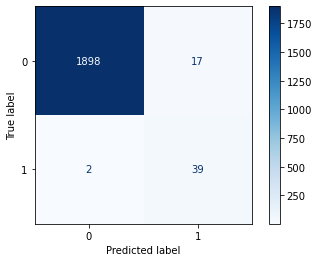

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plot_confusion_matrix(lr,X_test,y_test , cmap=plt.cm.Blues)


In [29]:
print('accuracy_score : ', metrics.accuracy_score(y_test,lr_predicted))
print('precision : ', metrics.precision_score(y_test,lr_predicted))
print('recall : ', metrics.recall_score(y_test,lr_predicted))
print('f1 : ', metrics.f1_score(y_test,lr_predicted))
print('auc : ',auc(fpr,tpr))


accuracy_score :  0.9902862985685071
precision :  0.6964285714285714
recall :  0.9512195121951219
f1 :  0.8041237113402062
auc :  0.9711711137999108


In [30]:
# auc(metrics.precision_score(y_test,lr_predicted),metrics.recall_score(y_test,lr_predicted))

In [31]:
from sklearn.metrics import roc_auc_score
print('roc auc value {}'.format(roc_auc_score(y_test,lr_predicted)))

roc auc value 0.9711711137999108


In [32]:
confusion_matrix(y_test,lr_predicted)

array([[1898,   17],
       [   2,   39]], dtype=int64)

## RF

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=16, min_samples_leaf=4, min_samples_split=4,
                       n_jobs=-1, random_state=0, n_estimators=500)
rf.fit(X_train_over, y_train_over)

C:\Users\BM\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(max_depth=16, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=500, n_jobs=-1, random_state=0)

In [35]:
from sklearn.metrics import accuracy_score

rf_predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_predicted)

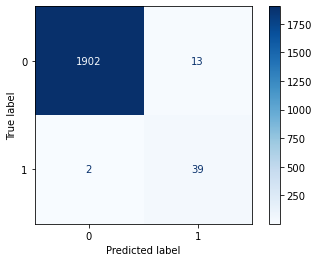

In [36]:
plot_confusion_matrix(rf,X_test,y_test , cmap=plt.cm.Blues)

In [37]:
print('accuracy_score : ', metrics.accuracy_score(y_test,rf_predicted))
print('precision : ', metrics.precision_score(y_test,rf_predicted))
print('recall : ', metrics.recall_score(y_test,rf_predicted))
print('f1 : ', metrics.f1_score(y_test,rf_predicted))

accuracy_score :  0.9923312883435583
precision :  0.75
recall :  0.9512195121951219
f1 :  0.8387096774193549


In [38]:
print('roc auc value {}'.format(roc_auc_score(y_test,rf_predicted)))

roc auc value 0.9722155002228874


## DT

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=8)
dt.fit(X_train_over, y_train_over)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=8)

In [40]:
dt_predicted = dt.predict(X_test)

In [41]:
# fpr, tpr, thresholds = roc_curve(y, dt.decision_function(X))

In [42]:
print('accuracy_score : ', metrics.accuracy_score(y_test,dt_predicted))
print('precision : ', metrics.precision_score(y_test,dt_predicted))
print('recall : ', metrics.recall_score(y_test,dt_predicted))
print('f1 : ', metrics.f1_score(y_test,dt_predicted))

accuracy_score :  0.9918200408997955
precision :  0.7906976744186046
recall :  0.8292682926829268
f1 :  0.8095238095238095


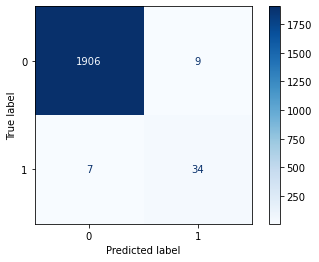

In [43]:
plot_confusion_matrix(dt,X_test,y_test , cmap=plt.cm.Blues)

In [44]:
print('roc auc value {}'.format(roc_auc_score(y_test,dt_predicted)))

roc auc value 0.9122842768897662


## LightGBM

In [45]:
# !pip install lightgbm

In [46]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(max_depth=15, min_child_samples=60, n_estimators=701,subsample=0.8)
lgbm.fit(X_train_over,y_train_over)

C:\Users\BM\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMClassifier(max_depth=15, min_child_samples=60, n_estimators=701,
               subsample=0.8)

In [47]:
lgbm_predicted=lgbm.predict(X_test)

In [48]:
print('accuracy_score : ', metrics.accuracy_score(y_test,lgbm_predicted))
print('precision : ', metrics.precision_score(y_test,lgbm_predicted))
print('recall : ', metrics.recall_score(y_test,lgbm_predicted))
print('f1 : ', metrics.f1_score(y_test,lgbm_predicted))

accuracy_score :  0.9948875255623721
precision :  0.8604651162790697
recall :  0.9024390243902439
f1 :  0.8809523809523809


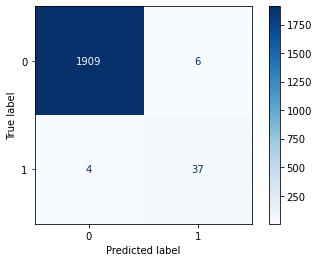

In [49]:
plot_confusion_matrix(lgbm,X_test,y_test , cmap=plt.cm.Blues)

In [50]:
print('roc auc value {}'.format(roc_auc_score(y_test,lgbm_predicted)))

roc auc value 0.9496529325606572


## XGBoost

In [51]:
# !pip install xgboost

In [52]:
import xgboost as xgb
xgb=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=8, min_child_weight=1, 
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=99, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [53]:
xgb.fit(X_train_over,y_train_over)

C:\Users\BM\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\BM\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=99, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [54]:
xgb_predicted=xgb.predict(X_test)

In [55]:
print('accuracy_score : ', metrics.accuracy_score(y_test,xgb_predicted))
print('precision : ', metrics.precision_score(y_test,xgb_predicted))
print('recall : ', metrics.recall_score(y_test,xgb_predicted))
print('f1 : ', metrics.f1_score(y_test,xgb_predicted))

accuracy_score :  0.9948875255623721
precision :  0.8444444444444444
recall :  0.926829268292683
f1 :  0.8837209302325582


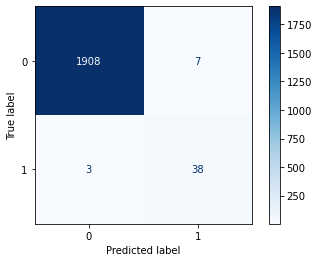

In [56]:
plot_confusion_matrix(xgb,X_test,y_test , cmap=plt.cm.Blues)

In [57]:
print('roc auc value {}'.format(roc_auc_score(y_test,xgb_predicted)))

roc auc value 0.9615869579061326


## SVM

In [58]:
import sklearn.svm as svm

In [59]:
svc=svm.SVC(kernel='linear',C = 10.0, gamma=1.0)

In [60]:
svc.fit(X_train_over,y_train_over)

C:\Users\BM\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=10.0, gamma=1.0, kernel='linear')

In [61]:
svc_predicted=svc.predict(X_test)

In [62]:
print('accuracy_score : ', metrics.accuracy_score(y_test,svc_predicted))
print('precision : ', metrics.precision_score(y_test,svc_predicted))
print('recall : ', metrics.recall_score(y_test,svc_predicted))
print('f1 : ', metrics.f1_score(y_test,svc_predicted))

accuracy_score :  0.9892638036809815
precision :  0.6785714285714286
recall :  0.926829268292683
f1 :  0.7835051546391752


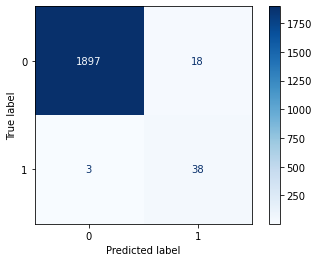

In [63]:
plot_confusion_matrix(svc,X_test,y_test , cmap=plt.cm.Blues)

In [64]:
print('roc auc value {}'.format(roc_auc_score(y_test,svc_predicted)))

roc auc value 0.9587148952429472


## GBM

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbm=GradientBoostingClassifier(learning_rate=0.1, max_depth=16, max_features=2,
                           min_samples_leaf=4, min_samples_split=16,
                           n_estimators=500, random_state=42)

gbm.fit(X_train_over,y_train_over.values.ravel())

GradientBoostingClassifier(max_depth=16, max_features=2, min_samples_leaf=4,
                           min_samples_split=16, n_estimators=500,
                           random_state=42)

In [66]:
gbm_predicted = gbm.predict(X_test)

In [67]:
print('accuracy_score : ', metrics.accuracy_score(y_test,gbm_predicted))
print('precision : ', metrics.precision_score(y_test,gbm_predicted))
print('recall : ', metrics.recall_score(y_test,gbm_predicted))
print('f1 : ', metrics.f1_score(y_test,gbm_predicted))

accuracy_score :  0.9943762781186094
precision :  0.8947368421052632
recall :  0.8292682926829268
f1 :  0.860759493670886


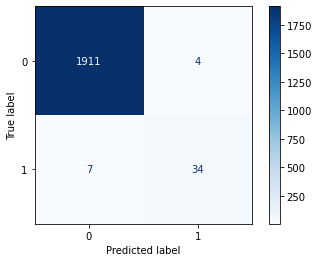

In [68]:
plot_confusion_matrix(gbm,X_test,y_test , cmap=plt.cm.Blues)

In [69]:
print('roc auc value {}'.format(roc_auc_score(y_test,gbm_predicted)))

roc auc value 0.9135897599184869


In [70]:
lr_list=[metrics.accuracy_score(y_test,lr_predicted),metrics.precision_score(y_test,lr_predicted),metrics.recall_score(y_test,lr_predicted),metrics.f1_score(y_test,lr_predicted),roc_auc_score(y_test,lr_predicted)]
dt_list=[metrics.accuracy_score(y_test,dt_predicted),metrics.precision_score(y_test,dt_predicted),metrics.recall_score(y_test,dt_predicted),metrics.f1_score(y_test,dt_predicted),roc_auc_score(y_test,dt_predicted)]
rf_list=[metrics.accuracy_score(y_test,rf_predicted),metrics.precision_score(y_test,rf_predicted),metrics.recall_score(y_test,rf_predicted),metrics.f1_score(y_test,rf_predicted),roc_auc_score(y_test,rf_predicted)]
xgb_list=[metrics.accuracy_score(y_test,xgb_predicted),metrics.precision_score(y_test,xgb_predicted),metrics.recall_score(y_test,xgb_predicted),metrics.f1_score(y_test,xgb_predicted),roc_auc_score(y_test,xgb_predicted)]
svc_list=[metrics.accuracy_score(y_test,svc_predicted),metrics.precision_score(y_test,svc_predicted),metrics.recall_score(y_test,svc_predicted),metrics.f1_score(y_test,svc_predicted),roc_auc_score(y_test,svc_predicted)]
gbm_list=[metrics.accuracy_score(y_test,gbm_predicted),metrics.precision_score(y_test,gbm_predicted),metrics.recall_score(y_test,gbm_predicted),metrics.f1_score(y_test,gbm_predicted),roc_auc_score(y_test,gbm_predicted)]
lgbm_list=[metrics.accuracy_score(y_test,lgbm_predicted),metrics.precision_score(y_test,lgbm_predicted),metrics.recall_score(y_test,lgbm_predicted),metrics.f1_score(y_test,lgbm_predicted),roc_auc_score(y_test,lgbm_predicted)]


In [71]:
result=pd.DataFrame([lr_list,dt_list,rf_list,xgb_list,svc_list,gbm_list,lgbm_list]).T
result.columns=['lr','dt','rf','xgb','svc','gbm','lgbm']
result.index=['accuracy','precision','recall','f1','auc']
result

,lr,dt,rf,xgb,svc,gbm,lgbm
accuracy,0.990286,0.991820,0.992331,0.994888,0.989264,0.994376,0.994888
precision,0.696429,0.790698,0.750000,0.844444,0.678571,0.894737,0.860465
recall,0.951220,0.829268,0.951220,0.926829,0.926829,0.829268,0.902439
f1,0.804124,0.809524,0.838710,0.883721,0.783505,0.860759,0.880952
auc,0.971171,0.912284,0.972216,0.961587,0.958715,0.913590,0.949653


In [72]:
result.T

,accuracy,precision,recall,f1,auc
lr,0.990286,0.696429,0.951220,0.804124,0.971171
dt,0.991820,0.790698,0.829268,0.809524,0.912284
rf,0.992331,0.750000,0.951220,0.838710,0.972216
xgb,0.994888,0.844444,0.926829,0.883721,0.961587
svc,0.989264,0.678571,0.926829,0.783505,0.958715
gbm,0.994376,0.894737,0.829268,0.860759,0.913590
lgbm,0.994888,0.860465,0.902439,0.880952,0.949653


In [74]:
import shap
explainer = shap.TreeExplainer(xgb) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [82]:
mean_shap_feature_values_for_recommend = pd.DataFrame(shap_values, columns=X.columns).abs().mean(axis=0).sort_values(ascending=False)
mean_shap_feature_values_for_recommend

r_forks                  5.000719
r_watch                  1.951208
r_readme_trend           0.818104
r_total_issue            0.433225
r_open_issues            0.405657
o_followers              0.298557
c_star_avg               0.280885
r_tag_num                0.136948
o_des_size               0.128758
r_description_trend      0.126352
c_codesize               0.124652
r_pr_total               0.122009
o_type_User              0.117987
o_following              0.113898
r_pr_open                0.094143
o_repos                  0.072963
o_gists                  0.066258
o_type_Organization      0.062525
c_following_avg          0.060957
r_num_language           0.055550
c_descriptionsize_avg    0.045638
c_commit_active          0.029138
c_commit_avg             0.024261
c_followers_avg          0.011941
c_repos_avg              0.007276
c_gits_avg               0.006286
r_contributor_count      0.001763
r_tag_trend              0.000246
c_influence              0.000000
dtype: float32

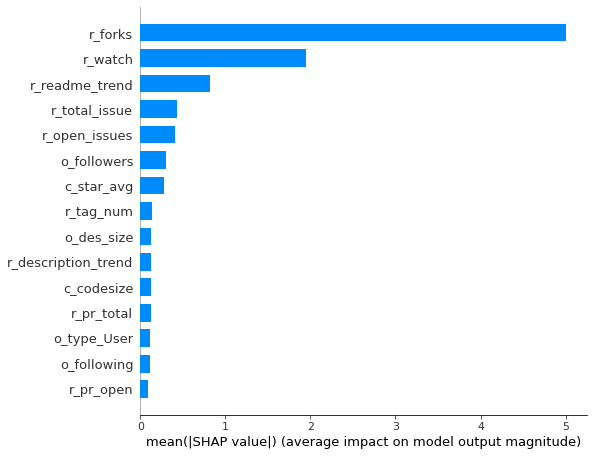

In [77]:
shap.summary_plot(shap_values, X, plot_type='bar',max_display=15)

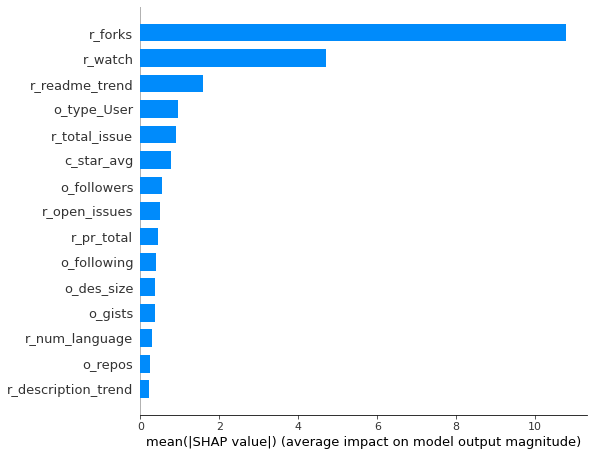

In [83]:
explainer2 = shap.TreeExplainer(lgbm) # Tree model Shap Value 확인 객체 지정
shap_values2 = explainer2.shap_values(X_test)

shap.summary_plot(shap_values2[0], X, plot_type='bar',max_display=15)

In [85]:
mean_shap_feature_values_for_recommend2 = pd.DataFrame(shap_values2[0], columns=X.columns).abs().mean(axis=0).sort_values(ascending=False)[:15]
mean_shap_feature_values_for_recommend2

r_forks                10.772177
r_watch                 4.704057
r_readme_trend          1.577518
o_type_User             0.949149
r_total_issue           0.889281
c_star_avg              0.775023
o_followers             0.545476
r_open_issues           0.504568
r_pr_total              0.442711
o_following             0.392878
o_des_size              0.367123
o_gists                 0.356799
r_num_language          0.295848
o_repos                 0.231898
r_description_trend     0.213758
dtype: float64

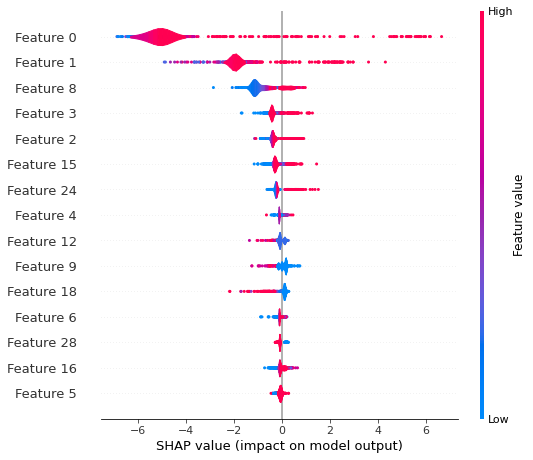

In [87]:
shap.summary_plot(shap_values, X_test, plot_type='violin',max_display=15)

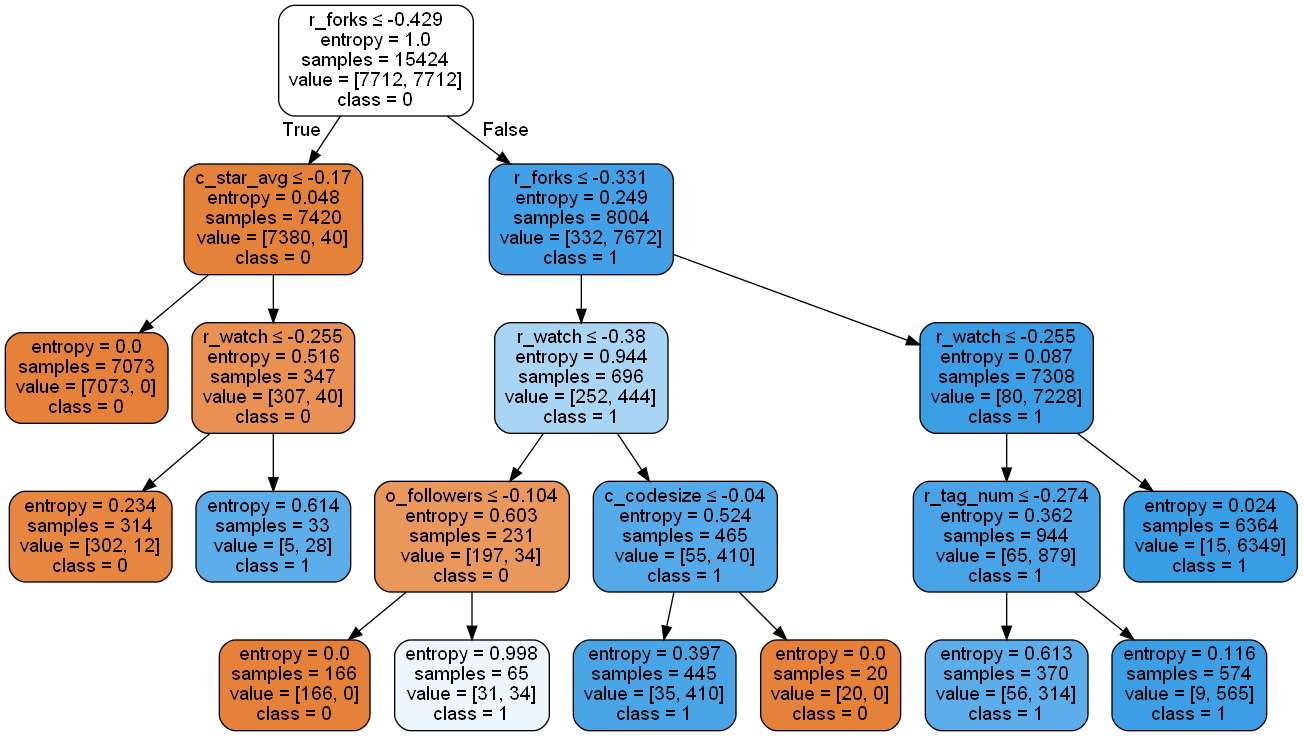

In [143]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
col_names=X_label
dot_data = export_graphviz(dt, out_file=None, feature_names=col_names,
                          class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
import operator
def plot_feature_importances2(model):

    n_features = X.shape[1]
    new_array=dict(zip(X.columns , model.feature_importances_))
    
    assending=sorted(new_array.items(),key=operator.itemgetter(1))
    new_columns=[assending[i][0] for i in range(len(assending))]
    new_imp=[assending[i][1] for i in range(len(assending))]
    
    
    plt.barh(range(n_features), new_imp, align='center')
    
    columns= new_columns
    
    plt.yticks(range(n_features),columns)

    plt.xlabel("importances")

    plt.ylabel("feature")
    plt.ylim(14, n_features)
    

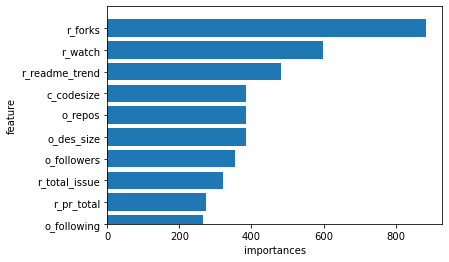

In [194]:
plot_feature_importances2(lgbm)
plt.show()

In [ ]:
plot_feature_importances2(xgb)
plt.show()